In [1]:
!pip install -q pandas numpy tensorflow scikit-learn statsmodels matplotlib seaborn gradio torch timesfm
!pip install -q huggingface_hub tirex trl peft accelerate bitsandbytes tf-keras "transformers>=4.30.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [2]:
!pip install -q git+https://github.com/amazon-science/chronos-forecasting.git


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [4]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)


# List all files
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.csv'):
            full_path = os.path.join(root, f)
            print(" -> Found CSV:", full_path)

# Choose the correct CSV file path above and load
file = full_path  # once identified
df = pd.read_csv(file, encoding='latin-1')
print("\nINFO:\n")
print(df.info())
print("\nDESCRIBE:\n")
print(df.describe())
print("\nSHAPE:\n")
print(df.shape)
print("\nCOLUMNS:\n")
print(df.columns)
print("\nDATA TYPES:\n")
print(df.dtypes)
print("\nUNIQUE VALUES:\n")
print(df.nunique())
print("\nHEAD:\n")
print(df.head())
print("\nTAIL\n:")
print(df.tail())

100%|██████████| 7.20M/7.20M [00:00<00:00, 68.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1
 -> Found CSV: /root/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1/data.csv

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

DESCRIBE:

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1

In [5]:
print("NULL VALUES:")
print(df.isnull().sum())
# Fill rows where 'Description' is null
df['Description'].fillna(inplace=True, value='') # Fill with empty string as descriptions are text

print("\nNULL VALUES AFTER DROPPING NULL DESCRIPTIONS:")
print(df.isnull().sum())

NULL VALUES:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

NULL VALUES AFTER DROPPING NULL DESCRIPTIONS:


/tmp/ipython-input-5-2177110169.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(inplace=True, value='') # Fill with empty string as descriptions are text


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Fill missing values in 'CustomerID' with the mean of the column
mean_customer_id = df['CustomerID'].mean()
df['CustomerID'].fillna(mean_customer_id, inplace=True)

print("\nNULL VALUES AFTER FILLING CUSTOMERID WITH MEAN:")
print(df.isnull().sum())



NULL VALUES AFTER FILLING CUSTOMERID WITH MEAN:


/tmp/ipython-input-6-3288619810.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(mean_customer_id, inplace=True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [7]:
# duplicate Values
print("Duplicate Values:")
print(df[df.duplicated()])

# Remove Duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicate Values After Removal:")
print(df[df.duplicated()])

Duplicate Values:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/201

In [8]:
# Handle inconsistencies

# Remove rows with negative Quantity
df = df[df['Quantity'] > 0]

# Remove rows with negative UnitPrice
df = df[df['UnitPrice'] > 0]

# Remove rows where InvoiceNo starts with 'C' (cancellations)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

print("Shape after handling inconsistencies:")
print(df.shape)

Shape after handling inconsistencies:
(524878, 8)


In [9]:
# Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

numerical_cols = ['Quantity', 'UnitPrice']

for col in numerical_cols:
    initial_shape = df.shape
    df = remove_outliers_iqr(df, col)
    print(f"Shape after removing outliers from {col}: {df.shape}")

print("\nShape after removing outliers from all numerical columns:")
print(df.shape)

Shape after removing outliers from Quantity: (497767, 8)
Shape after removing outliers from UnitPrice: (460251, 8)

Shape after removing outliers from all numerical columns:
(460251, 8)


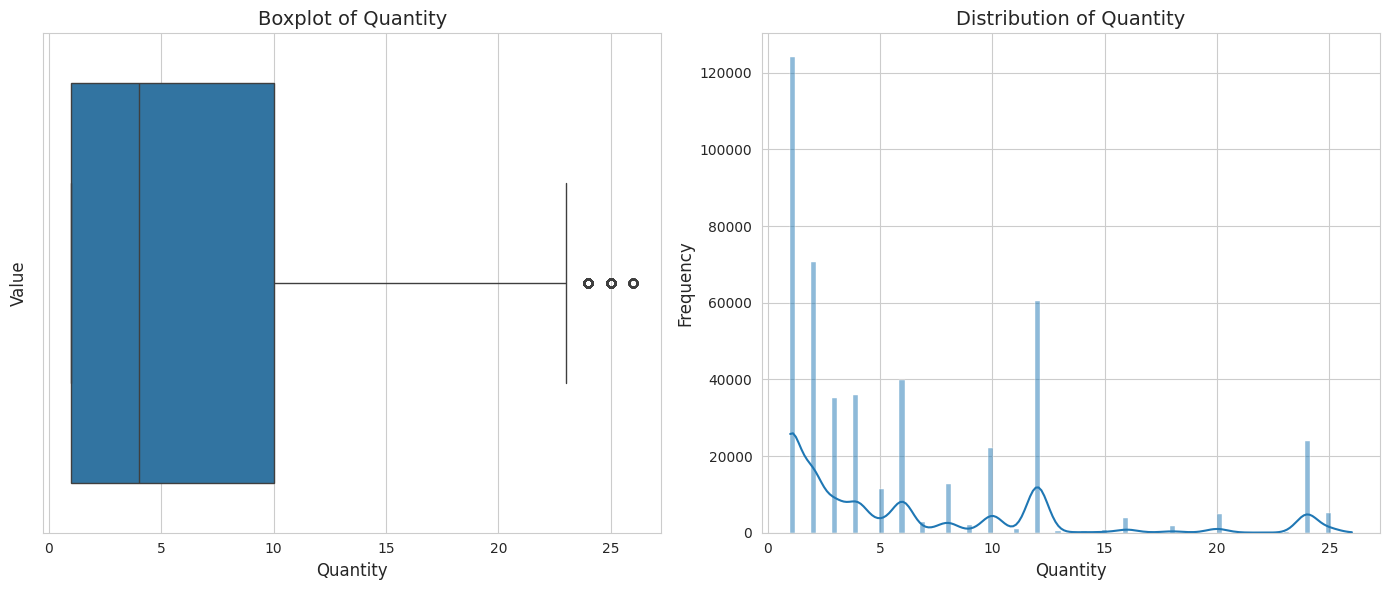

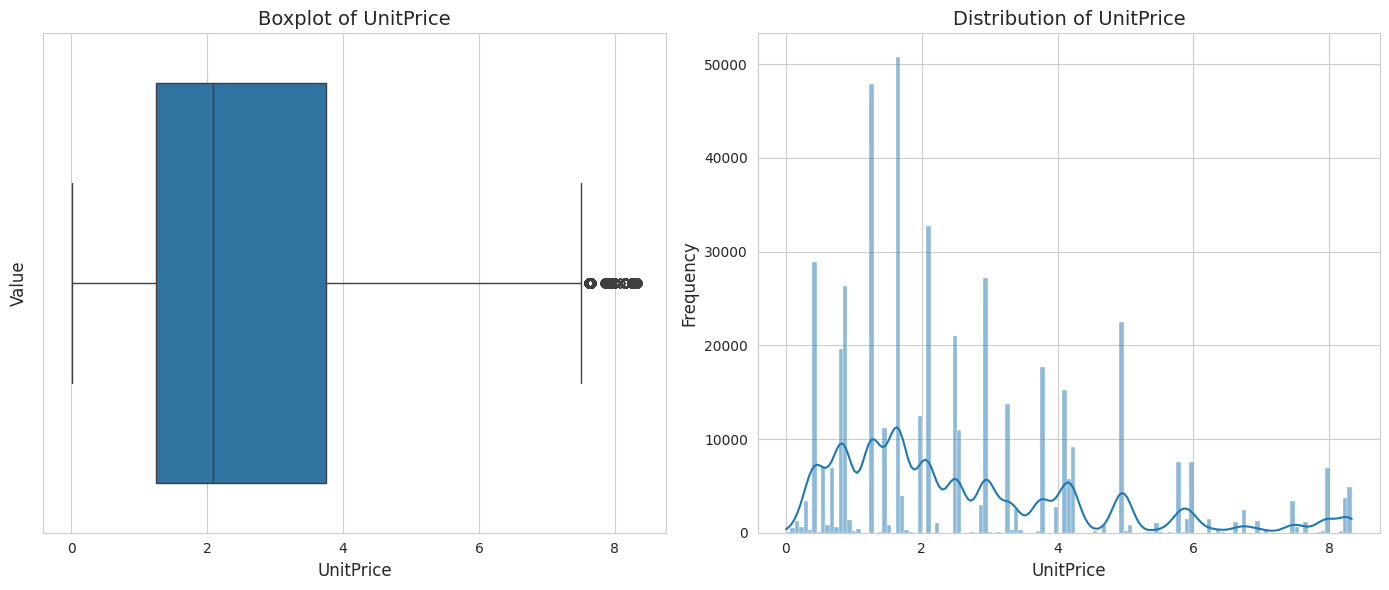

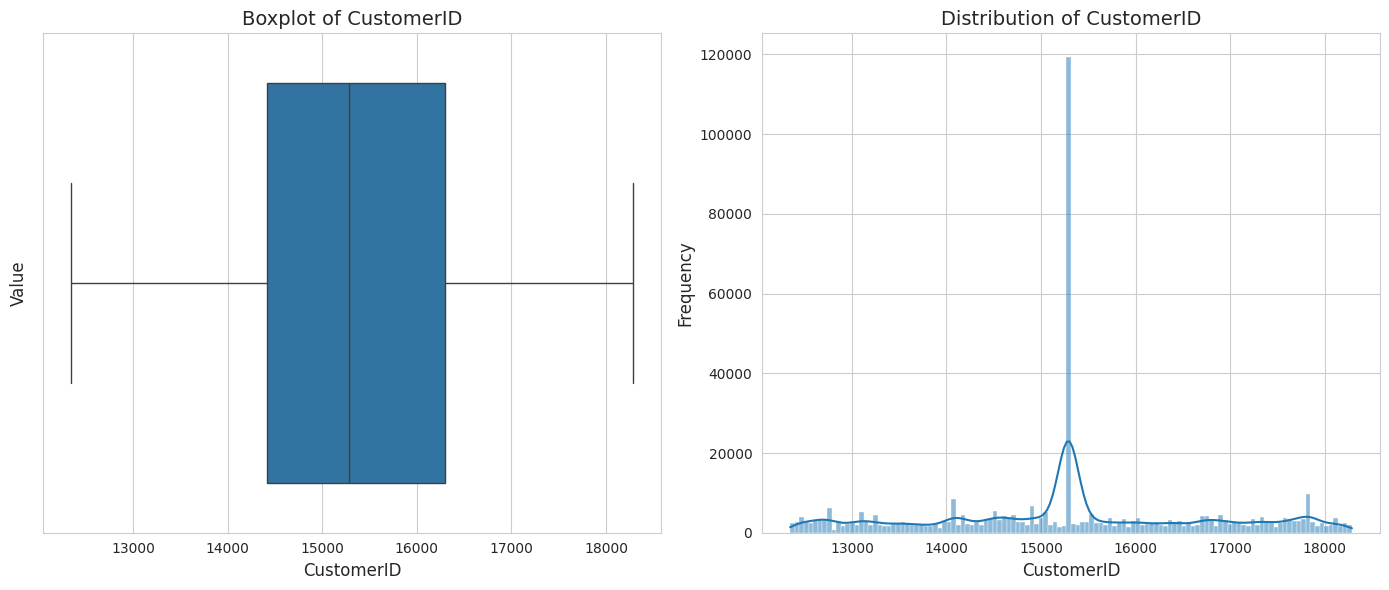

/tmp/ipython-input-10-1234691454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


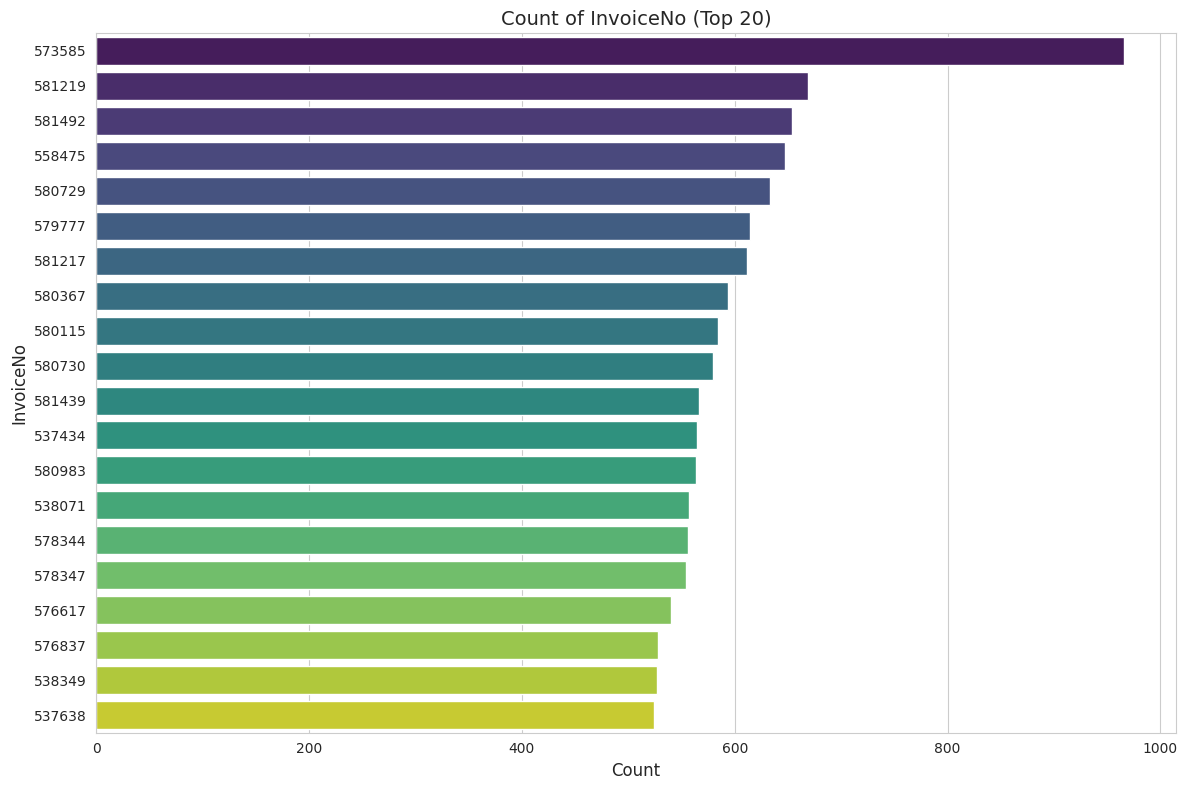

/tmp/ipython-input-10-1234691454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


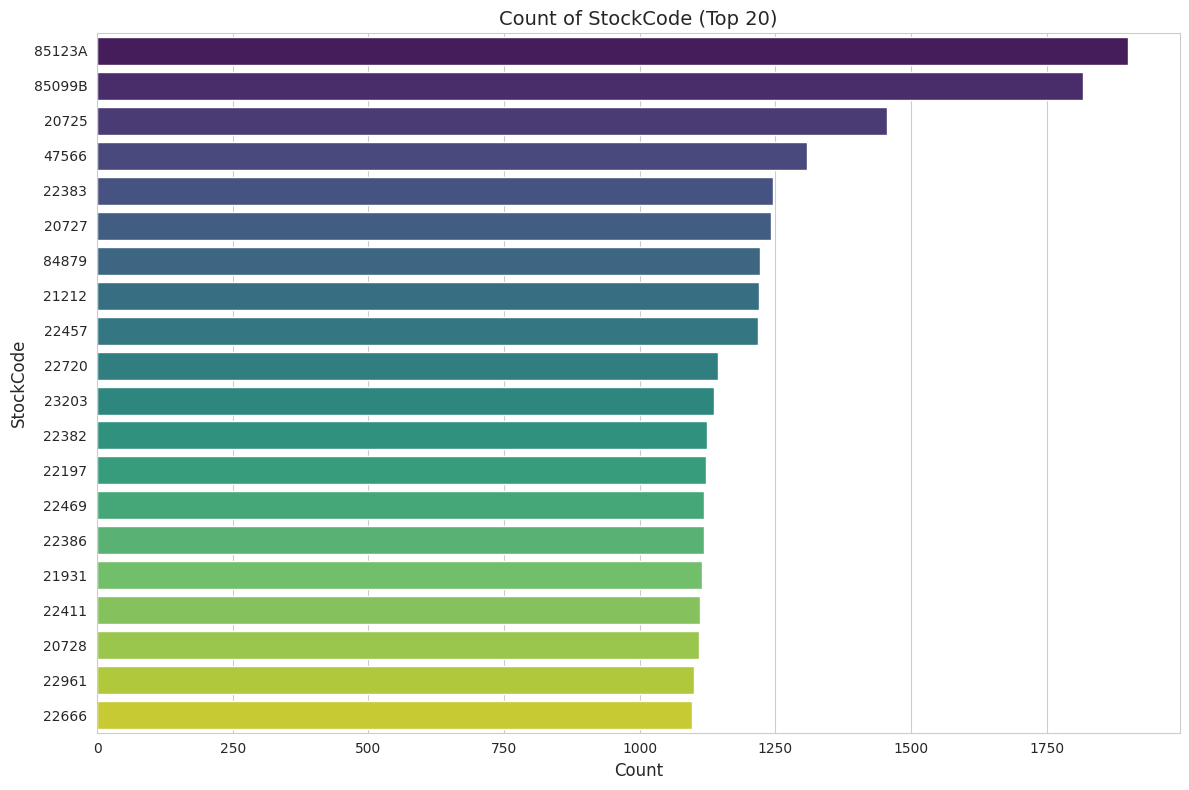

/tmp/ipython-input-10-1234691454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


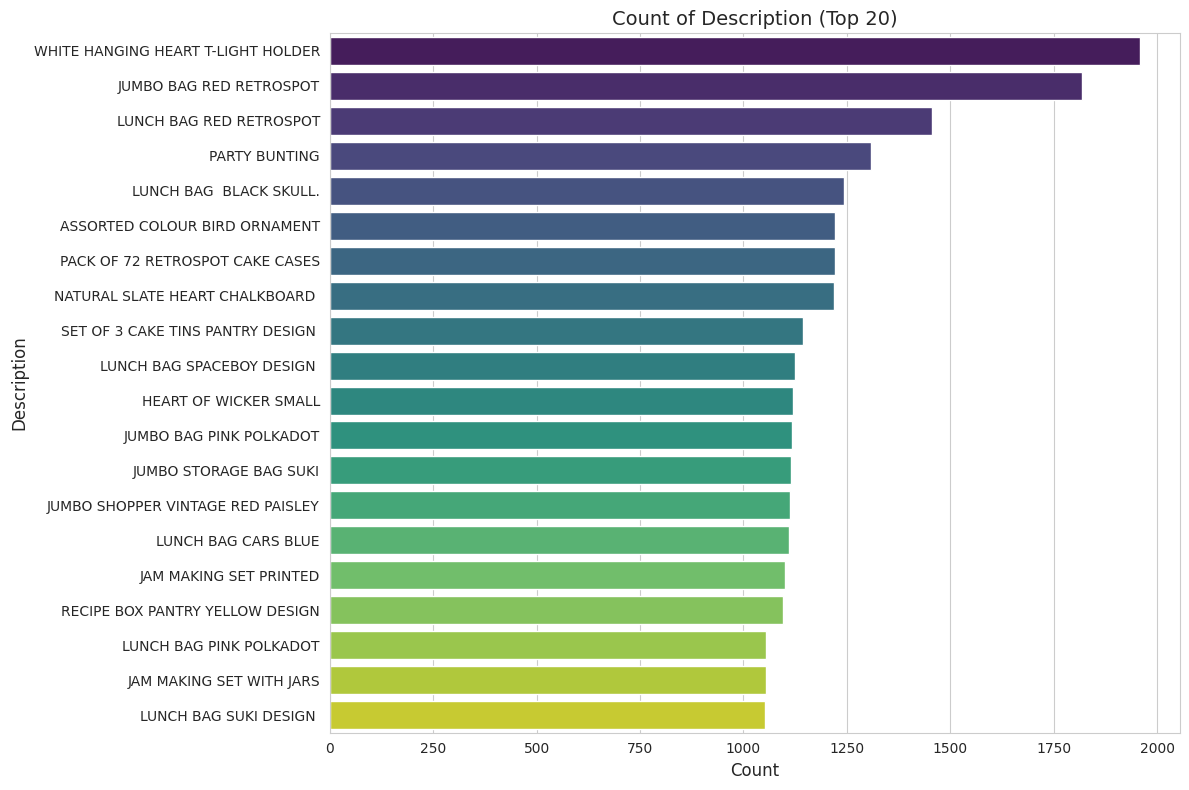

/tmp/ipython-input-10-1234691454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


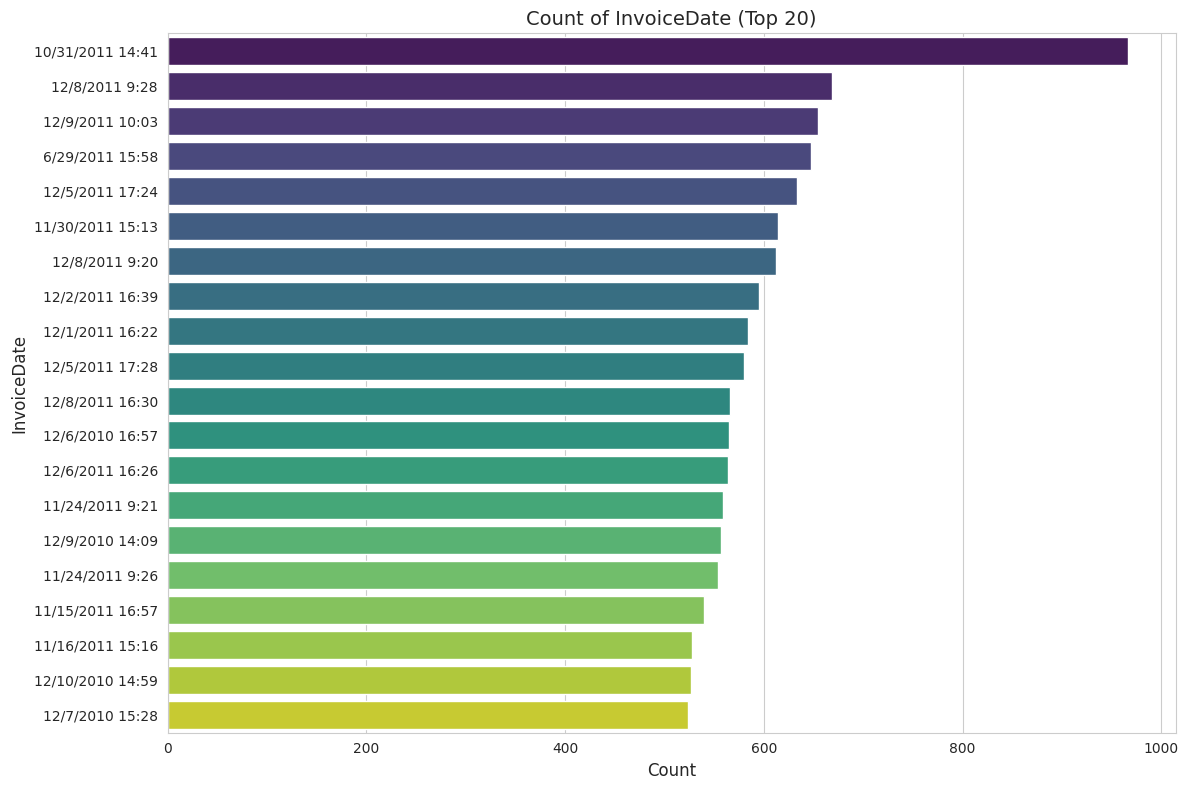

/tmp/ipython-input-10-1234691454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_categories, palette='viridis')


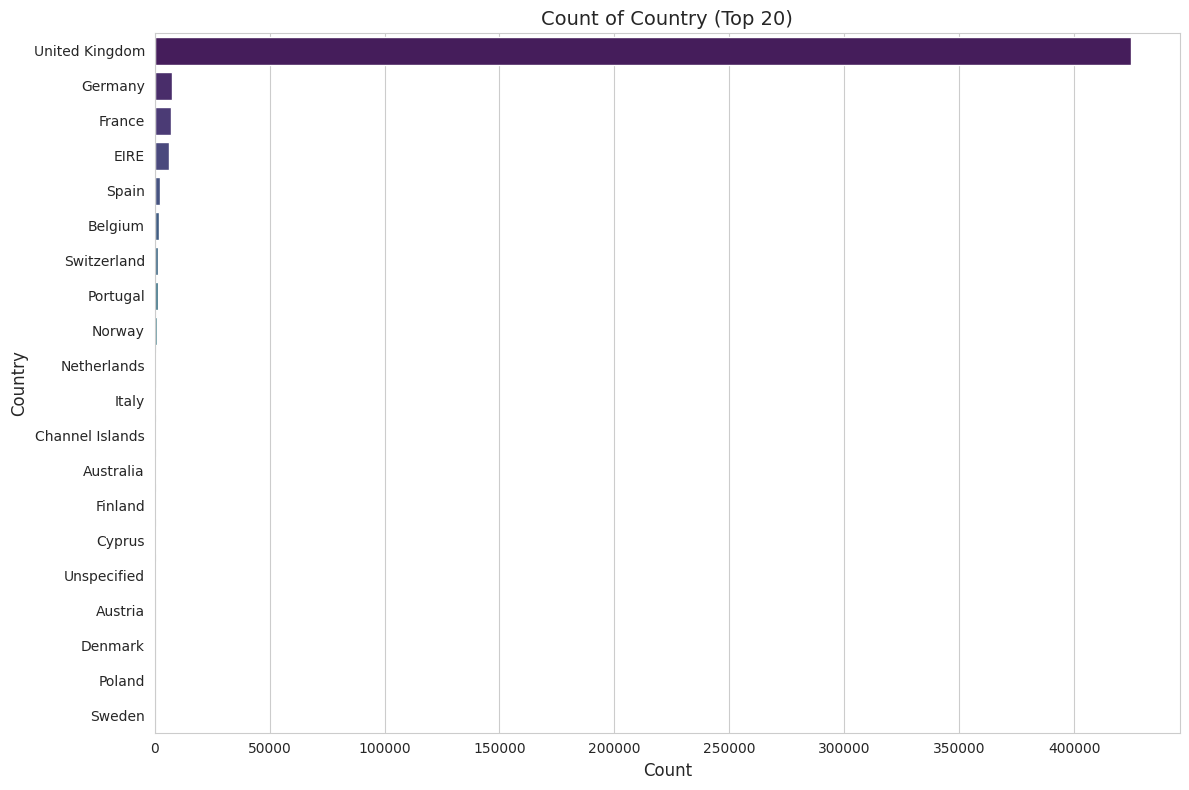

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a style for the plots
sns.set_style("whitegrid")

# Get numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Plot numerical columns
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Increased figure size for better readability

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Value', fontsize=12)


    # Histplot
    sns.histplot(df[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}', fontsize=14)
    axes[1].set_xlabel(col, fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)


    plt.tight_layout()
    plt.show()

# Plot categorical columns
for col in categorical_cols:
    plt.figure(figsize=(12, 8)) # Increased figure size
    # Limit to top 20 categories for better readability
    top_categories = df[col].value_counts().nlargest(20).index
    sns.countplot(y=df[col], order=top_categories, palette='viridis')
    plt.title(f'Count of {col} (Top 20)', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()


In [11]:
import torch
import timesfm

# For PyTorch
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend='pytorch', # Changed from <backend> to 'pytorch'
          per_core_batch_size=32,
          horizon_len=128,
          input_patch_len=32,
          output_patch_len=128,
          num_layers=50,
          model_dims=1280,
          use_positional_embedding=False,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0].


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

torch_model.ckpt:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

In [17]:
# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate data by day, summing Quantity and averaging UnitPrice
daily_aggregated_data = df.groupby(df['InvoiceDate'].dt.date).agg(
    TotalQuantity=('Quantity', 'sum'),
    AverageUnitPrice=('UnitPrice', 'mean')
).reset_index()

# Convert the 'InvoiceDate' column back to datetime objects after aggregation
daily_aggregated_data['InvoiceDate'] = pd.to_datetime(daily_aggregated_data['InvoiceDate'])

# Rename the date column to 'ds' as required by the forecasting model
daily_aggregated_data.rename(columns={'InvoiceDate': 'ds'}, inplace=True)

# Prepare the data in a long format with 'unique_id', 'ds', and 'y' columns
# Create a unique_id for each metric ('quantity' and 'unit_price')
quantity_ts = daily_aggregated_data[['ds', 'TotalQuantity']].copy()
quantity_ts['unique_id'] = 'quantity'
quantity_ts.rename(columns={'TotalQuantity': 'y'}, inplace=True)

unit_price_ts = daily_aggregated_data[['ds', 'AverageUnitPrice']].copy()
unit_price_ts['unique_id'] = 'unit_price'
unit_price_ts.rename(columns={'AverageUnitPrice': 'y'}, inplace=True)

# Concatenate the two time series
prepared_df = pd.concat([quantity_ts, unit_price_ts])

# Sort by unique_id and ds
prepared_df.sort_values(by=['unique_id', 'ds'], inplace=True)

# Display the prepared data
print("Prepared Data for Forecasting:")
display(prepared_df.head())
display(prepared_df.info())

Prepared Data for Forecasting:


,ds,y,unique_id
0,2010-12-01,13054.0,quantity
1,2010-12-02,12766.0,quantity
2,2010-12-03,8789.0,quantity
3,2010-12-05,10891.0,quantity
4,2010-12-06,14176.0,quantity


<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 0 to 304
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         610 non-null    datetime64[ns]
 1   y          610 non-null    float64       
 2   unique_id  610 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 19.1+ KB


None

In [18]:
forecast_df = tfm.forecast_on_df(
    inputs=prepared_df, # Changed from df to prepared_df
    freq="D",  # Changed from "M" to "D" as we aggregated by day
    value_name="y",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


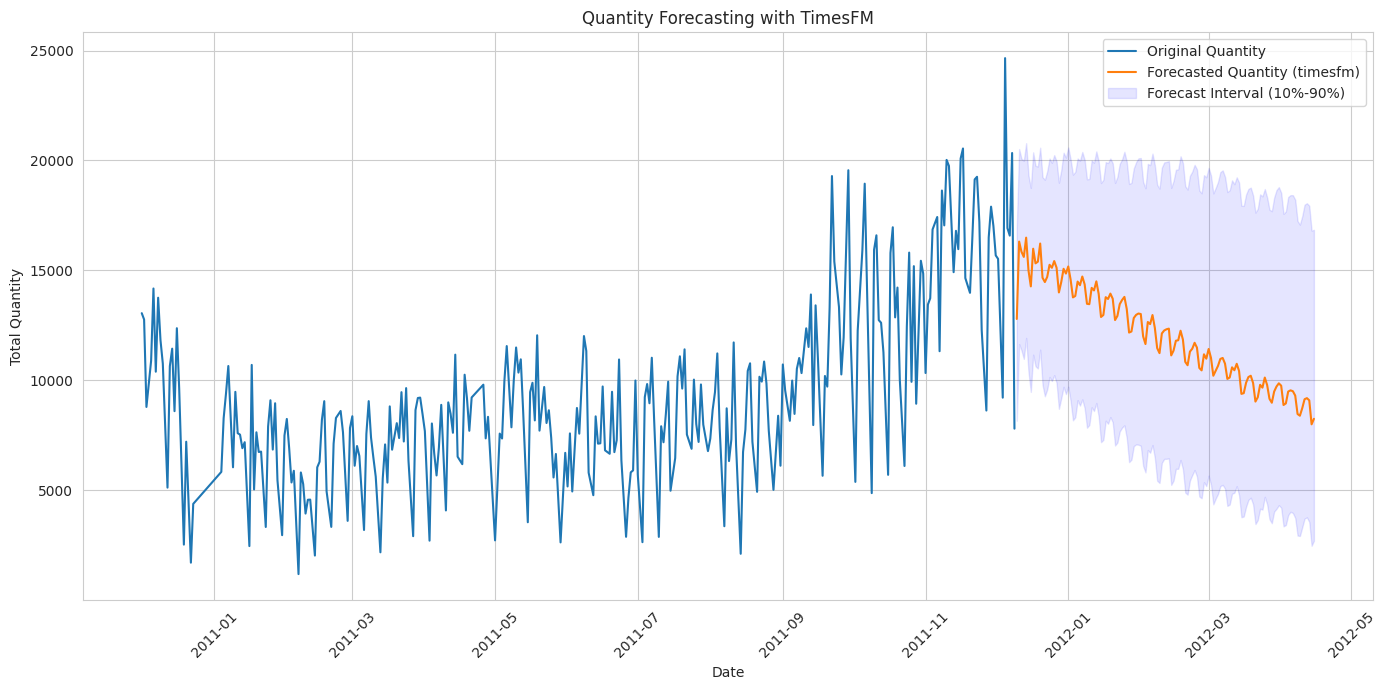

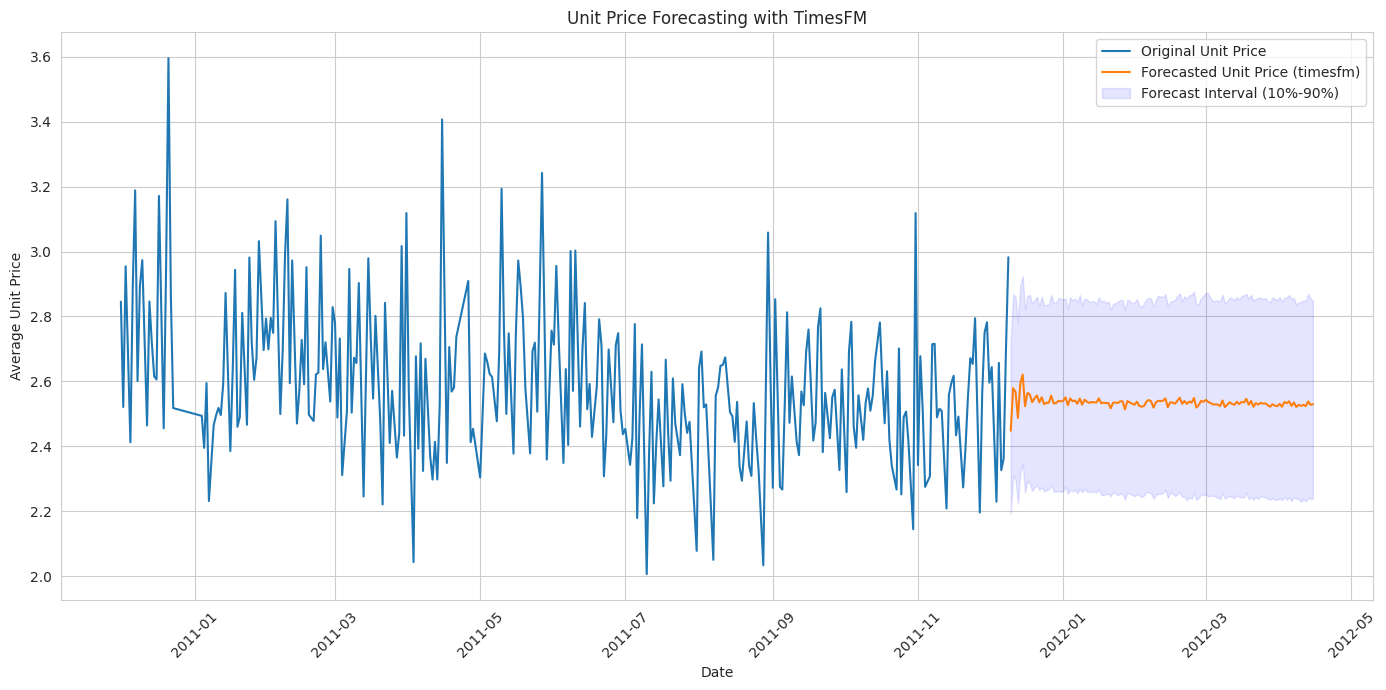

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the forecast data for Quantity and UnitPrice
forecast_quantity_df = forecast_df[forecast_df['unique_id'] == 'quantity'].copy()
forecast_unit_price_df = forecast_df[forecast_df['unique_id'] == 'unit_price'].copy()

# Separate the original data for plotting
original_quantity_df = prepared_df[prepared_df['unique_id'] == 'quantity'].copy()
original_unit_price_df = prepared_df[prepared_df['unique_id'] == 'unit_price'].copy()


# Plot the forecast for Quantity
plt.figure(figsize=(14, 7))
sns.lineplot(data=original_quantity_df, x='ds', y='y', label='Original Quantity')
sns.lineplot(data=forecast_quantity_df, x='ds', y='timesfm', label='Forecasted Quantity (timesfm)')
plt.fill_between(forecast_quantity_df['ds'], forecast_quantity_df['timesfm-q-0.1'], forecast_quantity_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
plt.title('Quantity Forecasting with TimesFM')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the forecast for UnitPrice
plt.figure(figsize=(14, 7))
sns.lineplot(data=original_unit_price_df, x='ds', y='y', label='Original Unit Price')
sns.lineplot(data=forecast_unit_price_df, x='ds', y='timesfm', label='Forecasted Unit Price (timesfm)')
plt.fill_between(forecast_unit_price_df['ds'], forecast_unit_price_df['timesfm-q-0.1'], forecast_unit_price_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
plt.title('Unit Price Forecasting with TimesFM')
plt.xlabel('Date')
plt.ylabel('Average Unit Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_mse(actual, predicted):
  return mean_squared_error(actual, predicted)

def calculate_mae(actual, predicted):
  return mean_absolute_error(actual, predicted)

def calculate_rmse(actual, predicted):
  return np.sqrt(mean_squared_error(actual, predicted))


print("Functions to calculate MSE, MAE, and RMSE created.")

Functions to calculate MSE, MAE, and RMSE created.


In [23]:
if len(prepared_df) > 30:
    actual_test_quantity = prepared_df[prepared_df['unique_id'] == 'quantity']['y'].tail(30)
    predicted_test_quantity = forecast_quantity_df['timesfm'].head(30) # Assuming the first 30 forecasts correspond to the test period

    actual_test_unit_price = prepared_df[prepared_df['unique_id'] == 'unit_price']['y'].tail(30)
    predicted_test_unit_price = forecast_unit_price_df['timesfm'].head(30) # Assuming the first 30 forecasts correspond to the test period

    # Ensure the lengths match (important for real evaluation)
    min_len_quantity = min(len(actual_test_quantity), len(predicted_test_quantity))
    actual_test_quantity = actual_test_quantity.iloc[:min_len_quantity]
    predicted_test_quantity = predicted_test_quantity.iloc[:min_len_quantity]

    min_len_unit_price = min(len(actual_test_unit_price), len(predicted_test_unit_price))
    actual_test_unit_price = actual_test_unit_price.iloc[:min_len_unit_price]
    predicted_test_unit_price = predicted_test_unit_price.iloc[:min_len_unit_price]


    print("--- Evaluation Metrics (Demonstration) ---")

    # Evaluate Quantity forecasts
    mse_quantity = calculate_mse(actual_test_quantity, predicted_test_quantity)
    mae_quantity = calculate_mae(actual_test_quantity, predicted_test_quantity)
    rmse_quantity = calculate_rmse(actual_test_quantity, predicted_test_quantity)

    print(f"\nQuantity Forecast Evaluation:")
    print(f"  MSE: {mse_quantity}")
    print(f"  MAE: {mae_quantity}")
    print(f"  RMSE: {rmse_quantity}")

    # Evaluate Unit Price forecasts
    mse_unit_price = calculate_mse(actual_test_unit_price, predicted_test_unit_price)
    mae_unit_price = calculate_mae(actual_test_unit_price, predicted_test_unit_price)
    rmse_unit_price = calculate_rmse(actual_test_unit_price, predicted_test_unit_price)

    print(f"\nUnit Price Forecast Evaluation:")
    print(f"  MSE: {mse_unit_price}")
    print(f"  MAE: {mae_unit_price}")
    print(f"  RMSE: {rmse_unit_price}")

else:
    print("Not enough data points to create a meaningful test set for this demonstration.")

--- Evaluation Metrics (Demonstration) ---

Quantity Forecast Evaluation:
  MSE: 15015126.065393511
  MAE: 3141.2580078125
  RMSE: 3874.935620806301

Unit Price Forecast Evaluation:
  MSE: 0.03371127201240734
  MAE: 0.1512674735566912
  RMSE: 0.1836062962221267


In [26]:
def plot_forecasts():
    """Generates and returns plots for Quantity and Unit Price forecasts."""

    # Plot the forecast for Quantity
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=original_quantity_df, x='ds', y='y', label='Original Quantity')
    sns.lineplot(data=forecast_quantity_df, x='ds', y='timesfm', label='Forecasted Quantity (timesfm)')
    plt.fill_between(forecast_quantity_df['ds'], forecast_quantity_df['timesfm-q-0.1'], forecast_quantity_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
    plt.title('Quantity Forecasting with TimesFM')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    quantity_fig = plt.gcf() # Get the current figure
    plt.close() # Close the figure to prevent it from displaying immediately

    # Plot the forecast for UnitPrice
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=original_unit_price_df, x='ds', y='y', label='Original Unit Price')
    sns.lineplot(data=forecast_unit_price_df, x='ds', y='timesfm', label='Forecasted Unit Price (timesfm)')
    plt.fill_between(forecast_unit_price_df['ds'], forecast_unit_price_df['timesfm-q-0.1'], forecast_unit_price_df['timesfm-q-0.9'], color='blue', alpha=.1, label='Forecast Interval (10%-90%)')
    plt.title('Unit Price Forecasting with TimesFM')
    plt.xlabel('Date')
    plt.ylabel('Average Unit Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    unit_price_fig = plt.gcf() # Get the current figure
    plt.close() # Close the figure to prevent it from displaying immediately


    return quantity_fig, unit_price_fig

print("Function to plot forecasts created.")

Function to plot forecasts created.


In [28]:
interface = gr.Interface(
    fn=plot_forecasts,
    inputs=[],
    outputs=[gr.Plot(), gr.Plot()],
    title="TimesFM Forecast Visualization"
)

In [29]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f86cd0d880ef1672a8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import shutil
import os

# Define the path to the file in your Google Drive
# Replace 'MyDrive' with the actual name of your Google Drive folder if it's different
# Replace 'DAF.py' with the actual path to your file within your Drive
drive_file_path = "/content/drive/MyDrive/Colab Notebooks/DA'F.ipynb"

# Define the destination path in your Colab environment
colab_file_path = "DA'F.py"

# Check if the file exists in Google Drive before attempting to copy
if os.path.exists(drive_file_path):
    # Copy the file from Google Drive to the Colab environment
    shutil.copy(drive_file_path, colab_file_path)
    print(f"'{drive_file_path}' copied to '{colab_file_path}'")
else:
    print(f"Error: File not found in Google Drive at '{drive_file_path}'")

'/content/drive/MyDrive/Colab Notebooks/DA'F.ipynb' copied to 'DA'F.py'


In [45]:
import nbformat

nb = nbformat.read(drive_file_path, as_version=4)

if "widgets" in nb["metadata"]:
    if "state" not in nb["metadata"]["widgets"]:
        nb["metadata"].pop("widgets")

nbformat.write(nb, "DA'F.ipynb")

